In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
import itertools 
import warnings

In [66]:
df=pd.read_csv('GOOGL_2006-01-01_to_2018-01-01.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [67]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
Name       object
dtype: object

In [68]:
df=df.set_index('Date')
df.index=pd.to_datetime(df.index, format='%Y-%m-%d')

In [69]:
df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [70]:
df.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
Open      3019 non-null float64
High      3019 non-null float64
Low       3019 non-null float64
Close     3019 non-null float64
Volume    3019 non-null int64
Name      3019 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 165.1+ KB


In [72]:
ts_org=df['Close']

In [73]:
ts_org.head()

Date
2006-01-03    217.83
2006-01-04    222.84
2006-01-05    225.85
2006-01-06    233.06
2006-01-09    233.68
Name: Close, dtype: float64

In [43]:
ts=ts_org.resample('D').bfill()

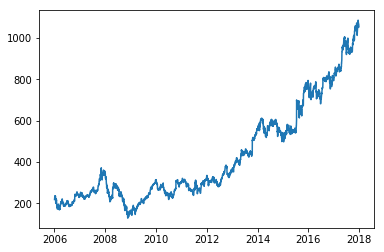

In [44]:
plt.plot(ts)

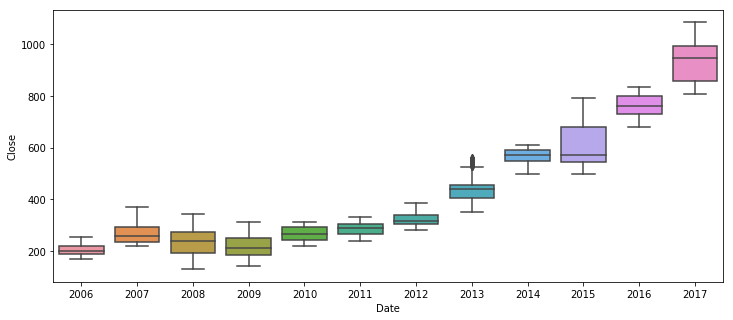

In [12]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ts.index.year, ts, ax=ax)

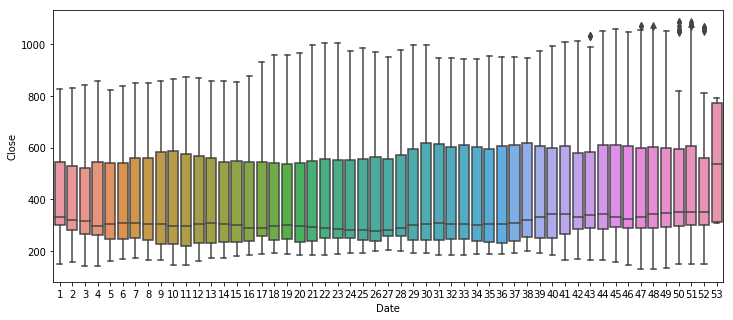

In [13]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ts.index.week, ts, ax=ax)

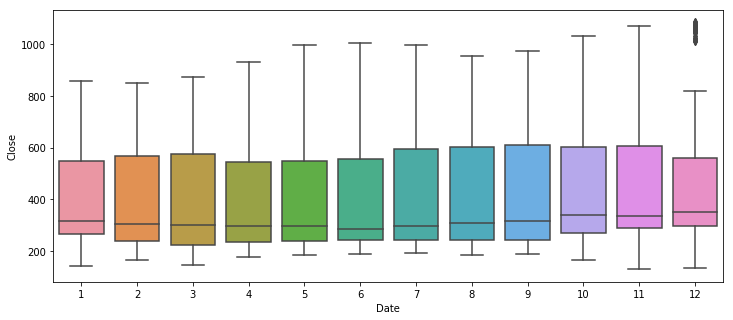

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
sns.boxplot(ts.index.month, ts, ax=ax)

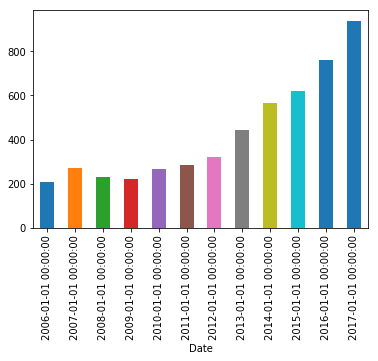

In [15]:
ts.resample('AS').mean().plot.bar()

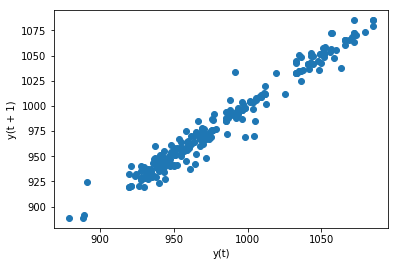

In [16]:
from pandas.plotting import lag_plot

lag_plot(ts.tail(250))

In [17]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series.rolling(timeseries, window=365).mean()
    rolstd = pd.Series.rolling(timeseries, window=365).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    dftest = adfuller(timeseries, autolag='AIC')
    print ('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

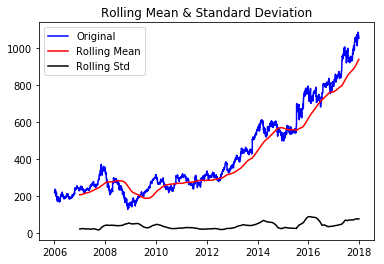

Results of Dickey-Fuller Test:
Test Statistic                    1.174126
p-value                           0.995802
#Lags Used                        5.000000
Number of Observations Used    4373.000000
Critical Value (10%)             -2.567122
Critical Value (5%)              -2.862201
Critical Value (1%)              -3.431846
dtype: float64


In [18]:
test_stationarity(ts)

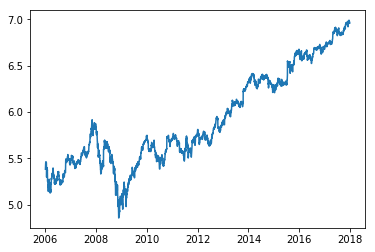

In [19]:
ts_log = np.log(ts)
plt.plot(ts_log)

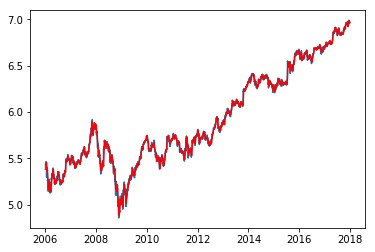

In [20]:
moving_avg = pd.Series.rolling(ts_log,7).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [21]:
ts_log_moving_avg_diff = ts_log - moving_avg
#ts_log_moving_avg_diff.head(30)

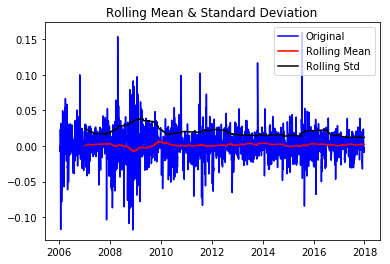

Results of Dickey-Fuller Test:
Test Statistic                -1.143297e+01
p-value                        6.449183e-21
#Lags Used                     2.800000e+01
Number of Observations Used    4.344000e+03
Critical Value (10%)          -2.567124e+00
Critical Value (5%)           -2.862206e+00
Critical Value (1%)           -3.431856e+00
dtype: float64


In [22]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

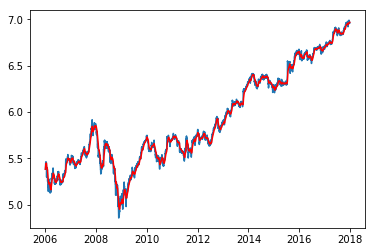

In [23]:
expwighted_avg = ts_log.ewm(halflife=7).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

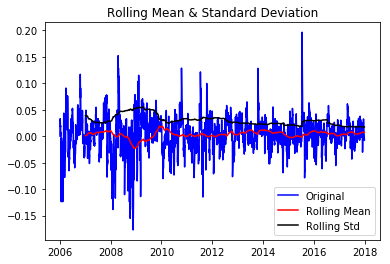

Results of Dickey-Fuller Test:
Test Statistic                -9.507648e+00
p-value                        3.314036e-16
#Lags Used                     2.800000e+01
Number of Observations Used    4.350000e+03
Critical Value (10%)          -2.567124e+00
Critical Value (5%)           -2.862205e+00
Critical Value (1%)           -3.431854e+00
dtype: float64


In [24]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

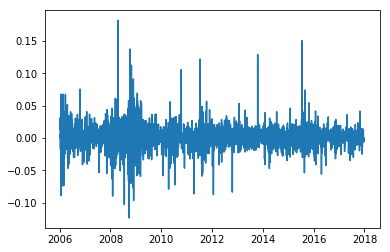

In [25]:
ts_log_diff = ts_log.diff()
plt.plot(ts_log_diff)

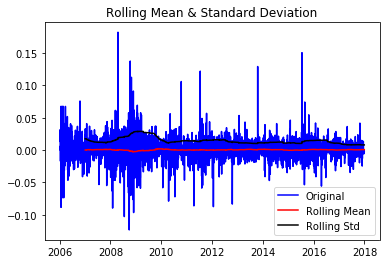

Results of Dickey-Fuller Test:
Test Statistic                -1.189270e+01
p-value                        5.817964e-22
#Lags Used                     2.700000e+01
Number of Observations Used    4.350000e+03
Critical Value (10%)          -2.567124e+00
Critical Value (5%)           -2.862205e+00
Critical Value (1%)           -3.431854e+00
dtype: float64


In [26]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

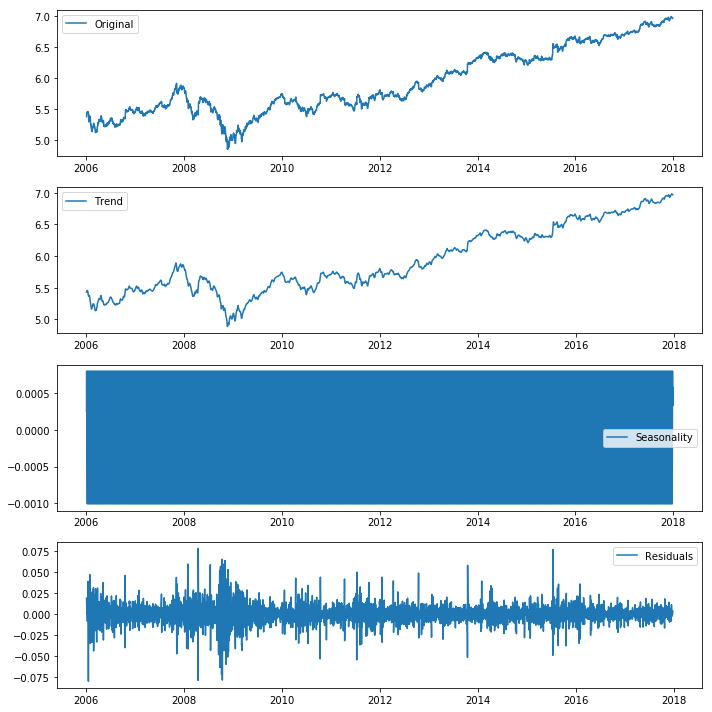

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

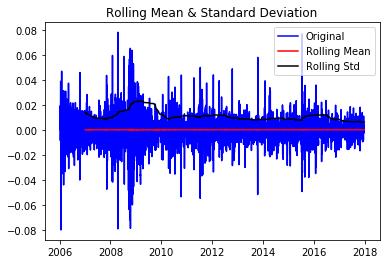

Results of Dickey-Fuller Test:
Test Statistic                  -20.760771
p-value                           0.000000
#Lags Used                       28.000000
Number of Observations Used    4344.000000
Critical Value (10%)             -2.567124
Critical Value (5%)              -2.862206
Critical Value (1%)              -3.431856
dtype: float64


In [28]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [29]:
#test_stationarity(test)

## ARIMA model

In [68]:
train, cv, test=ts_log_decompose['2006':'2013'], ts_log_decompose['2014':'2015'], ts_log_decompose['2014':'2017']

In [31]:
#from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

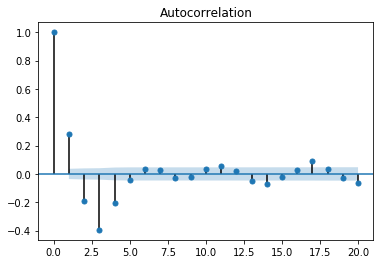

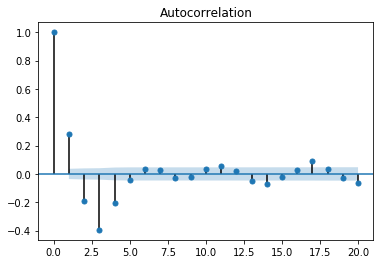

In [32]:
plot_acf(train, lags=20, alpha=0.05)

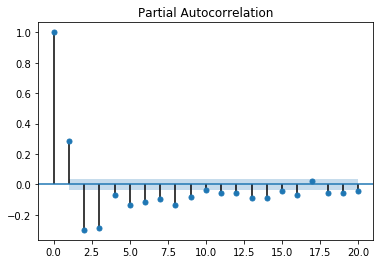

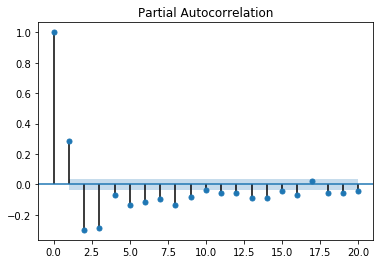

In [33]:
plot_pacf(train, lags=20, alpha=0.05)

In [34]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

Text(0,0.5,'AIC')

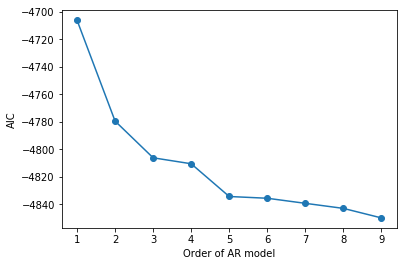

In [35]:
AIC=np.zeros(10)
for p in range (10):
    mod=ARMA(cv, order=(p,0))
    res=mod.fit(maxiter=200)
    AIC[p]=res.aic
plt.plot(range(1,10), AIC[1:10], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('AIC')

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0,0.5,'AIC')

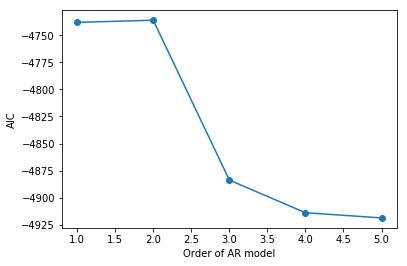

In [36]:
AIC=np.zeros(6)
for q in range (6):
    mod=ARMA(cv, order=(0,q))
    res=mod.fit(maxiter=200)
    AIC[q]=res.aic
plt.plot(range(1,6), AIC[1:6], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('AIC')

## AR model

In [37]:
from statsmodels.tsa.arima_model import ARMA, ARIMA

Text(0.5,1,'RSS: 0.3504')

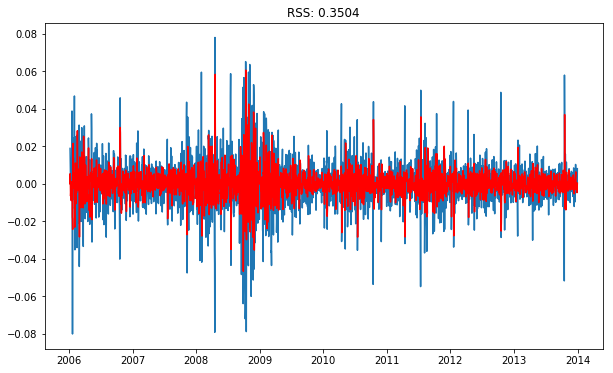

In [38]:
plt.figure(figsize=(10,6))
model = ARIMA(train, order=(9, 0, 0))  
results_AR = model.fit(disp=-1, maxiter=200)  
plt.plot(train)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-train)**2))

## MA model

/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:650: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.5/dist-packages/statsmodels/tsa/tsatools.py:651: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


Text(0.5,1,'RSS: 0.3301')

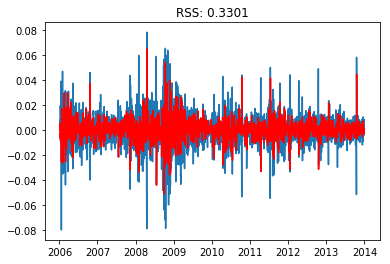

In [39]:
model = ARIMA(train, order=(0, 0, 4))  
results_MA = model.fit(disp=-1, maxiter=200)  
plt.plot(train)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-train)**2))

## combined model

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


Text(0.5,1,'RSS: 0.3279')

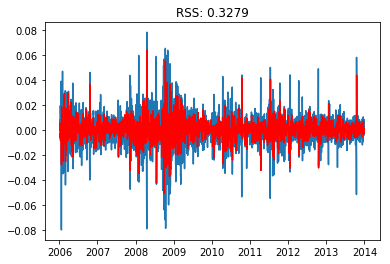

In [41]:
model = ARIMA(train, order=(9, 0, 4))  
results_ARIMA = model.fit(maxiter=200)  
plt.plot(train)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train)**2))

In [ ]:
AIC=np.zeros(10)
for p in range (5):
    mod=ARIMA(cv, order=(p,0,3))
    res=mod.fit(maxiter=500)
    AIC[p]=res.aic
plt.plot(range(1,10), AIC[1:10], marker='o')
plt.xlabel('Order of AR model')
plt.ylabel('AIC')

In [ ]:
mod = ARMA(cv, order=(9,0))
res = mod.fit(maxiter=200)
print("The AIC for an AR(9) is: ", res.aic)

mod = ARMA(cv, order=(0,4))
res = mod.fit(maxiter=200)
print("The AIC for an MA(4) is: ", res.aic)

mod = ARMA(cv, order=(0,3))
res = mod.fit(maxiter=200)
print("The AIC for an MA(3) is: ", res.aic)

mod = ARMA(cv, order=(3,3))
res = mod.fit(maxiter=200)
print("The AIC for an ARMA(3,3) is: ", res.aic)

mod = ARMA(cv, order=(3,4))
res = mod.fit(maxiter=200)
print("The AIC for an ARMA(3,4) is: ", res.aic)

/usr/local/lib/python3.5/dist-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5,1,'RSS: 0.3286')

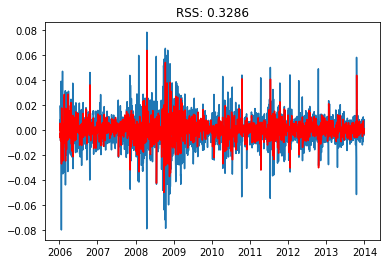

In [42]:
model = ARMA(train, order=(2, 3))  
results_ARIMA = model.fit(maxiter=400)  
plt.plot(train)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train)**2))

In [43]:
predictions_ARIMA_decomp_train = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_decomp_train.head()

Date
2006-01-06   -7.772876e-07
2006-01-07    5.182386e-03
2006-01-08   -1.558741e-03
2006-01-09   -6.448456e-03
2006-01-10   -4.671643e-03
Freq: D, dtype: float64

In [44]:
#predictions_AR_diff_cumsum = predictions_AR_diff.cumsum()


In [45]:
#predictions_AR_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
#predictions_AR_log = predictions_AR_log.add(predictions_AR_diff_cumsum,fill_value=0)
#predictions_AR_log.head()

In [46]:
predictions_ARIMA_log_train=predictions_ARIMA_decomp_train+seasonal[:len(train)]+trend[:len(train)]

In [47]:
predictions_ARIMA_log_train.isnull().sum()

6

Text(0.5,1,'RMSE: 2.7091')

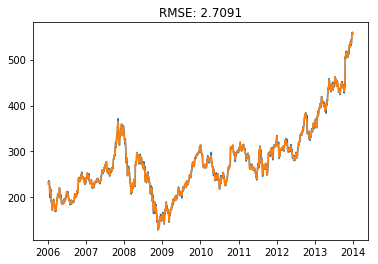

In [48]:
predictions_ARIMA_train = np.exp(predictions_ARIMA_log_train).resample('D').bfill()
#predictions_ARIMA=predictions_ARIMA[ts.index]
predictions_ARIMA_train.dropna(inplace=True)
#predictions_ARIMA=predictions_ARIMA.dropna()[predictions_ARIMA.index[(predictions_ARIMA.index.weekday_name!='Sunday') & (predictions_ARIMA.index.weekday_name!='Saturday')]]
plt.plot(ts[predictions_ARIMA_train.index])
plt.plot(predictions_ARIMA_train)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_train-ts[predictions_ARIMA_train.index])**2)/len(ts[predictions_ARIMA_train.index])))

In [49]:
pd.concat([predictions_ARIMA_train, ts[predictions_ARIMA_train.index]],axis=1 )

,0,Close
Date,,
2006-01-06,228.712092,233.06
2006-01-07,232.216883,233.68
2006-01-08,232.479307,233.68
2006-01-09,232.160235,233.68
2006-01-10,232.910570,235.11
2006-01-11,233.524291,236.05
2006-01-12,233.308303,232.05
2006-01-13,232.046551,233.36
2006-01-14,232.681073,233.79


In [50]:
predictions_ARIMA_decomp_test = pd.Series(results_ARIMA.predict(start='2014-01-01', end='2017-12-26'), copy=True)
predictions_ARIMA_decomp_test.head()

2014-01-01    0.002009
2014-01-02   -0.001645
2014-01-03   -0.003704
2014-01-04   -0.001791
2014-01-05   -0.000380
Freq: D, dtype: float64

In [54]:
predictions_ARIMA_log_test=(predictions_ARIMA_decomp_test+seasonal[:'2016'].values[-(predictions_ARIMA_decomp_test.size):]+trend[:'2016'].values[-(predictions_ARIMA_decomp_test.size):]).dropna()

Text(0.5,1,'RMSE: 150.4946')

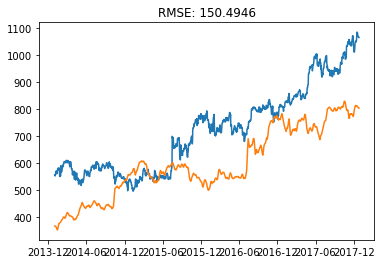

In [55]:
predictions_ARIMA_test = np.exp(predictions_ARIMA_log_test).resample('D').bfill()
#predictions_ARIMA=predictions_ARIMA[ts.index]
predictions_ARIMA_test.dropna(inplace=True)
#predictions_ARIMA=predictions_ARIMA.dropna()[predictions_ARIMA.index[(predictions_ARIMA.index.weekday_name!='Sunday') & (predictions_ARIMA.index.weekday_name!='Saturday')]]
plt.plot(ts[predictions_ARIMA_test.index])
plt.plot(predictions_ARIMA_test)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA_test-ts[predictions_ARIMA_test.index])**2)/len(ts[predictions_ARIMA_test.index])))

In [56]:
pd.concat([predictions_ARIMA_test, ts[predictions_ARIMA_test.index]],axis=1 )

,0,Close
2014-01-01,367.807146,557.12
2014-01-02,367.610405,557.12
2014-01-03,367.462260,553.05
2014-01-04,367.539178,559.22
2014-01-05,367.056176,559.22
2014-01-06,366.493663,559.22
2014-01-07,365.579826,570.00
2014-01-08,363.781767,571.19
2014-01-09,361.488939,565.69
2014-01-10,359.412216,565.66


In [268]:
train,test=ts_log['2006':'2015'],  ts_log['2016':'2017']

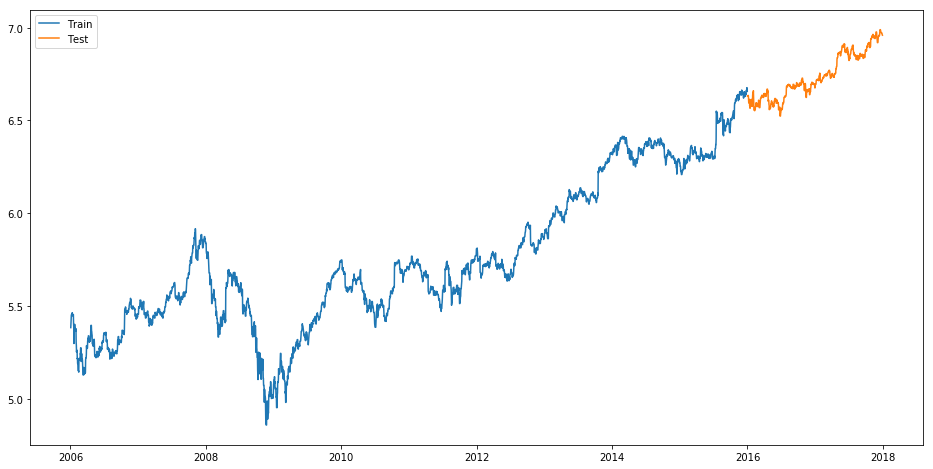

In [244]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
#plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [245]:
rms = np.sqrt(mean_squared_error(test, y_hat_avg.SES))
print(rms)

0.14419301530902243


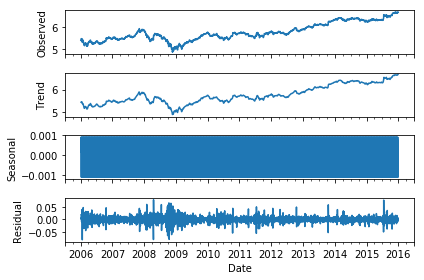

In [246]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train).plot()
result = sm.tsa.stattools.adfuller(train)
plt.show()

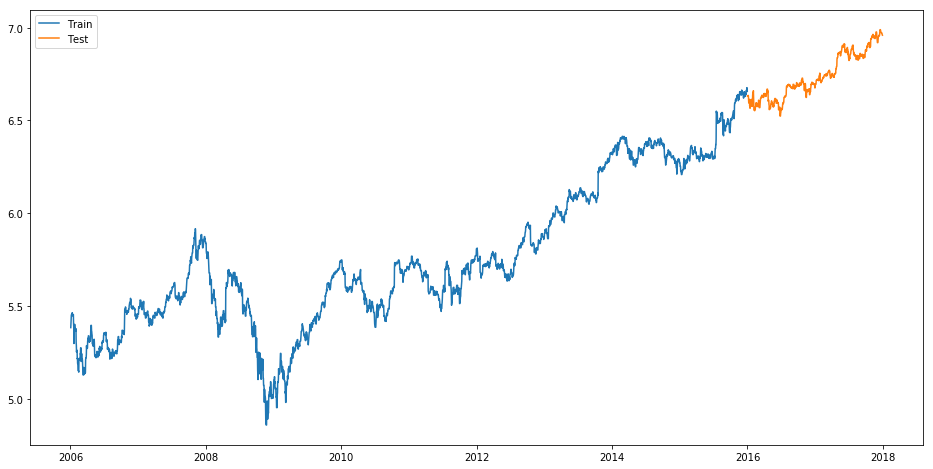

In [247]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
#plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [248]:
rms = sqrt(mean_squared_error(test, y_hat_avg.Holt_linear))
print(rms)

0.6473583639368635


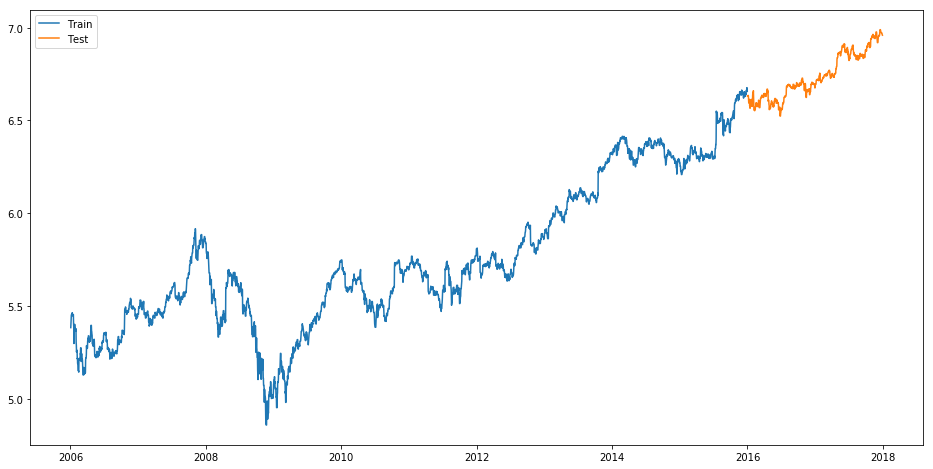

In [249]:
y_hat_avg_winter = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg_winter['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
#plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [250]:
rms = sqrt(mean_squared_error(test, y_hat_avg_winter.Holt_Winter))
print(rms)

0.1823977315949451


In [251]:
type(y_hat_avg_winter)

pandas.core.series.Series

In [252]:
y_hat_avg_winter.tail()

Date
2017-12-26 00:00:00                                              6.97153
2017-12-27 00:00:00                                              6.96621
2017-12-28 00:00:00                                               6.9622
2017-12-29 00:00:00                                              6.95978
Holt_Winter            [6.6601569077898795, 6.660416715252513, 6.6582...
Name: Close, dtype: object

In [253]:
len(y_hat_avg_winter['Holt_Winter'])

729

In [254]:
y_hat_avg_winter = pd.DataFrame(y_hat_avg_winter)

In [255]:
new_df=pd.Series.to_frame(y_hat_avg_winter['Close'][:-2])

In [256]:
new_df

,Close
Date,
2016-01-01,6.63258
2016-01-02,6.63258
2016-01-03,6.63258
2016-01-04,6.63258
2016-01-05,6.63533
2016-01-06,6.63244
2016-01-07,6.608
2016-01-08,6.59429
2016-01-09,6.59724


In [257]:

new_df.index=pd.to_datetime(new_df.index, format='%Y-%m-%d')

In [258]:
new_df['2016']

,Close
Date,
2016-01-01,6.63258
2016-01-02,6.63258
2016-01-03,6.63258
2016-01-04,6.63258
2016-01-05,6.63533
2016-01-06,6.63244
2016-01-07,6.608
2016-01-08,6.59429
2016-01-09,6.59724


In [259]:
for i in new_df.values:
    new_df['Close']= np.exp(int(i))

In [260]:
new_df

,Close
Date,
2016-01-01,403.428793
2016-01-02,403.428793
2016-01-03,403.428793
2016-01-04,403.428793
2016-01-05,403.428793
2016-01-06,403.428793
2016-01-07,403.428793
2016-01-08,403.428793
2016-01-09,403.428793


In [261]:
test1=pd.Series.to_frame(test[:-1])

In [262]:
test1

,Close
Date,
2016-01-01,6.632581
2016-01-02,6.632581
2016-01-03,6.632581
2016-01-04,6.632581
2016-01-05,6.635330
2016-01-06,6.632436
2016-01-07,6.608001
2016-01-08,6.594290
2016-01-09,6.597241


In [263]:
test1.index=pd.to_datetime(test1.index, format='%Y-%m-%d')

In [264]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 728 entries, 2016-01-01 to 2017-12-28
Freq: D
Data columns (total 1 columns):
Close    728 non-null float64
dtypes: float64(1)
memory usage: 11.4 KB


In [292]:
train

Date
2006-01-03    217.83
2006-01-04    222.84
2006-01-05    225.85
2006-01-06    233.06
2006-01-07    233.68
2006-01-08    233.68
2006-01-09    233.68
2006-01-10    235.11
2006-01-11    236.05
2006-01-12    232.05
2006-01-13    233.36
2006-01-14    233.79
2006-01-15    233.79
2006-01-16    233.79
2006-01-17    233.79
2006-01-18    222.68
2006-01-19    218.44
2006-01-20    199.93
2006-01-21    213.96
2006-01-22    213.96
2006-01-23    213.96
2006-01-24    221.74
2006-01-25    216.72
2006-01-26    217.35
2006-01-27    216.96
2006-01-28    213.62
2006-01-29    213.62
2006-01-30    213.62
2006-01-31    216.55
2006-02-01    201.09
               ...  
2015-12-02    777.85
2015-12-03    768.20
2015-12-04    779.21
2015-12-05    772.99
2015-12-06    772.99
2015-12-07    772.99
2015-12-08    775.14
2015-12-09    762.55
2015-12-10    760.04
2015-12-11    750.42
2015-12-12    762.54
2015-12-13    762.54
2015-12-14    762.54
2015-12-15    760.09
2015-12-16    776.59
2015-12-17    769.83
2015-12-

In [100]:
ts_month=ts.resample('M').ffill()

In [101]:
ts_month['2016']

Date
2016-01-31    770.77
2016-02-29    717.22
2016-03-31    762.90
2016-04-30    714.41
2016-05-31    748.85
2016-06-30    703.53
2016-07-31    800.94
2016-08-31    789.85
2016-09-30    804.06
2016-10-31    809.90
2016-11-30    775.88
2016-12-31    808.01
Freq: M, Name: Close, dtype: float64

# SARIMA Model

In [74]:
ts_month=ts_org.resample('M').var()

In [75]:
ts_month['2016']

Date
2016-01-31    263.151645
2016-02-29    454.514411
2016-03-31    266.146145
2016-04-30    581.601993
2016-05-31    128.870995
2016-06-30    413.160455
2016-07-31    558.967729
2016-08-31     35.104218
2016-09-30     64.718883
2016-10-31    111.299046
2016-11-30    173.479665
2016-12-31    279.469706
Freq: M, Name: Close, dtype: float64

In [76]:
train,test=ts_month['2006':'2015'],  ts_month['2016':'2017']

In [77]:
test

Date
2016-01-31    263.151645
2016-02-29    454.514411
2016-03-31    266.146145
2016-04-30    581.601993
2016-05-31    128.870995
2016-06-30    413.160455
2016-07-31    558.967729
2016-08-31     35.104218
2016-09-30     64.718883
2016-10-31    111.299046
2016-11-30    173.479665
2016-12-31    279.469706
2017-01-31    202.230605
2017-02-28    140.701426
2017-03-31    113.982323
2017-04-30    524.168373
2017-05-31    314.263940
2017-06-30    415.622278
2017-07-31    537.716603
2017-08-31     77.314763
2017-09-30    114.254584
2017-10-31    368.076407
2017-11-30     95.358263
2017-12-31    391.268283
Freq: M, Name: Close, dtype: float64

In [79]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [80]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1767.6550428040455
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1598.5651100373386
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1593.9038402961694
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1416.1914827638564
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1606.1248171196326
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1588.003526704851
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1432.1641204667847
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1416.2554494962567
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1751.5548290298716
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1583.6069709668539
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1580.6518351208247
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1403.1638333809046
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1606.1168930008625
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1575.148837825928
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1432.9032945706947
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1403.1742317967626
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1808.416956108454
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1636.576724593

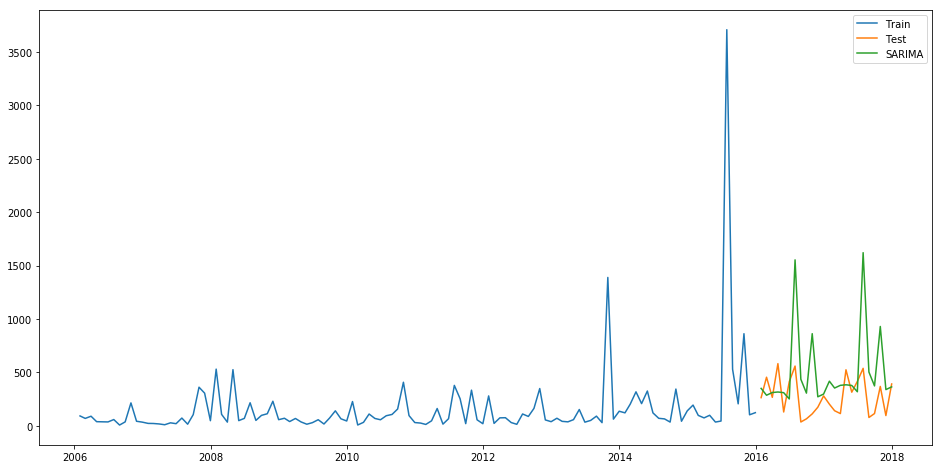

In [81]:
y_hat_avg_sarima = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train, order=(0, 1, 1),seasonal_order=(0,1,1,12),enforce_stationarity=False,enforce_invertibility=False).fit()
y_hat_avg_sarima['SARIMA'] = fit1.predict(start="2016-01-31", end="2017-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(y_hat_avg_sarima['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [82]:
#(1, 1, 1),seasonal_order=(0,1,1,12) :rms_test=65
#(0, 1, 1),seasonal_order=(1,1,1,12) : 60

In [83]:
rms = sqrt(mean_squared_error(train, fit1.fittedvalues))
print(rms)

362.98160505937653


In [85]:
rms = sqrt(mean_squared_error(test, y_hat_avg_sarima.SARIMA))
print(rms)

405.21242755547365


In [86]:
test

Date
2016-01-31    263.151645
2016-02-29    454.514411
2016-03-31    266.146145
2016-04-30    581.601993
2016-05-31    128.870995
2016-06-30    413.160455
2016-07-31    558.967729
2016-08-31     35.104218
2016-09-30     64.718883
2016-10-31    111.299046
2016-11-30    173.479665
2016-12-31    279.469706
2017-01-31    202.230605
2017-02-28    140.701426
2017-03-31    113.982323
2017-04-30    524.168373
2017-05-31    314.263940
2017-06-30    415.622278
2017-07-31    537.716603
2017-08-31     77.314763
2017-09-30    114.254584
2017-10-31    368.076407
2017-11-30     95.358263
2017-12-31    391.268283
Freq: M, Name: Close, dtype: float64

In [58]:
y_hat_avg_sarima['SARIMA']

2016-01-31    5594.972402
2016-02-07    5605.831345
2016-02-14    5620.716045
2016-02-21    5631.441180
2016-02-28    5636.983489
2016-03-06    5621.991315
2016-03-13    5614.692830
2016-03-20    5637.081789
2016-03-27    5700.356764
2016-04-03    5732.707038
2016-04-10    5718.654070
2016-04-17    5750.003965
2016-04-24    5767.987693
2016-05-01    5780.485539
2016-05-08    5790.480660
2016-05-15    5798.788681
2016-05-22    5801.970236
2016-05-29    5791.913148
2016-06-05    5783.867580
2016-06-12    5802.850438
2016-06-19    5864.886192
2016-06-26    5896.611719
2016-07-03    5881.858837
2016-07-10    5911.584772
2016-07-17    5928.960714
2016-07-24    5941.601288
2016-07-31    5951.170586
2016-08-07    5959.268105
2016-08-14    5962.244068
2016-08-21    5952.616765
                 ...     
2017-06-11    6551.049287
2017-06-18    6568.367251
2017-06-25    6581.021441
2017-07-02    6590.550119
2017-07-09    6598.627558
2017-07-16    6601.583909
2017-07-23    6591.997604
2017-07-30  